## Amazon Book Reviews Part V: Most Frequent Words in Positive and Negative Summary

#### This is the 5-core dataset which means that each user and item has at least 5 reviews. The dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/. 

### Introduction

Below 3 ratings are taken as negative and 4-5s are positive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [2]:
query1 = "SELECT overall, summary FROM amazon_book_small.summary_all \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2012-01-01 00:00:00 UTC'"

In [3]:
project_id = 'dotted-chiller-156222'

In [4]:
da = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 12.25 s. Waiting...
Query done.
Processed: 371.6 Mb

Retrieving results...
  Got page: 1; 4.0% done. Elapsed 28.01 s.
  Got page: 2; 7.0% done. Elapsed 34.12 s.
  Got page: 3; 11.0% done. Elapsed 39.19 s.
  Got page: 4; 14.0% done. Elapsed 43.9 s.
  Got page: 5; 18.0% done. Elapsed 49.3 s.
  Got page: 6; 22.0% done. Elapsed 54.48 s.
  Got page: 7; 25.0% done. Elapsed 60.1 s.
  Got page: 8; 29.0% done. Elapsed 64.5 s.
  Got page: 9; 33.0% done. Elapsed 69.62 s.
  Got page: 10; 36.0% done. Elapsed 75.17 s.
  Got page: 11; 40.0% done. Elapsed 80.4 s.
  Got page: 12; 43.0% done. Elapsed 84.73 s.
  Got page: 13; 47.0% done. Elapsed 89.83 s.
  Got page: 14; 51.0% done. Elapsed 93.98 s.
  Got page: 15; 54.0% done. Elapsed 99.88 s.
  Got page: 16; 58.0% done. Elapsed 105.06 s.
  Got page: 17; 61.0% done. Elapsed 110.27 s.
  Got page: 18; 65.0% done. Elapsed 115.22 s.
  Got page: 19; 69.0% done. Elapsed 120.27 s.
  Got page: 20; 72.0% done. Ela

In [5]:
da.head(1)

,overall,summary
0,5,Superb Analysis - Even Though Longwinded


In [6]:
query2 = "SELECT overall, summary FROM amazon_book_small.summary_all \
WHERE unixReviewTime >= '2012-01-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC'"

In [7]:
db = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.32 s. Waiting...
  Elapsed 22.08 s. Waiting...
  Elapsed 32.74 s. Waiting...
Query done.
Processed: 371.6 Mb

Retrieving results...
  Got page: 1; 2.0% done. Elapsed 42.8 s.
  Got page: 2; 3.0% done. Elapsed 47.3 s.
  Got page: 3; 5.0% done. Elapsed 51.39 s.
  Got page: 4; 7.0% done. Elapsed 56.65 s.
  Got page: 5; 8.0% done. Elapsed 62.05 s.
  Got page: 6; 10.0% done. Elapsed 66.98 s.
  Got page: 7; 11.0% done. Elapsed 72.82 s.
  Got page: 8; 13.0% done. Elapsed 78.22 s.
  Got page: 9; 15.0% done. Elapsed 82.92 s.
  Got page: 10; 16.0% done. Elapsed 87.97 s.
  Got page: 11; 18.0% done. Elapsed 93.7 s.
  Got page: 12; 20.0% done. Elapsed 97.48 s.
  Got page: 13; 21.0% done. Elapsed 102.63 s.
  Got page: 14; 23.0% done. Elapsed 107.73 s.
  Got page: 15; 24.0% done. Elapsed 113.25 s.
  Got page: 16; 26.0% done. Elapsed 118.17 s.
  Got page: 17; 28.0% done. Elapsed 123.67 s.
  Got page: 18; 29.0% done. Elapsed 129.01 s.
  Got page: 19;

In [8]:
db.head(1)

,overall,summary
0,5,"Meet the Master, ASAP!"


In [9]:
df = pd.concat([da, db])

In [10]:
def partition(x):
    if x < 3.0:
        return 'negative'
    return 'positive'

rating = df['overall']
rating = rating.map(partition)

tmp = df
tmp['overall'] = tmp['overall'].map(partition)

In [11]:
tmp.head()

,overall,summary
0,positive,Superb Analysis - Even Though Longwinded
1,positive,The Best I have every read
2,positive,A fantastic journey through the history of pub...
3,positive,Santa'sK id
4,positive,Indispensable guide


In [16]:
total = len(tmp)
total

8895872

In [18]:
pos = len(tmp[tmp.overall == 'positive'])
pos

8157203

In [19]:
neg = len(tmp[tmp.overall == 'negative'])
neg

738669

In [21]:
pos_frac = float(pos)/float(total)
pos_frac

0.9169649698197097

In [22]:
neg_frac = (1.0 -pos_frac)
neg_frac

0.08303503018029035

In [23]:
df.head(1)

,overall,summary
0,positive,Superb Analysis - Even Though Longwinded


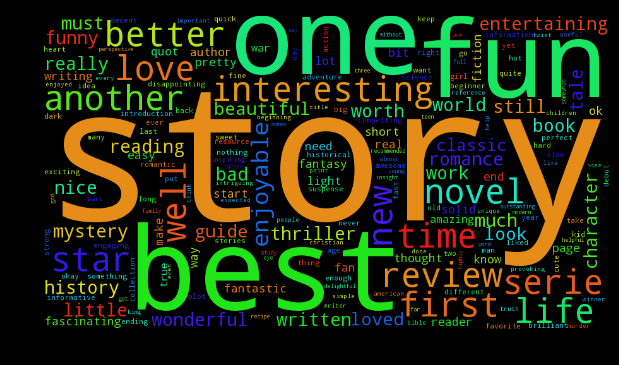

In [32]:
from wordcloud import WordCloud
import string
import nltk
from string import maketrans

positive_words = ''
negative_words = ''

intab = string.punctuation
outtab = "                                "
trantab = maketrans(intab, outtab)

pos = df.loc[df['overall'] == 'positive']
pos = pos[0:25000]

neg = df.loc[df['overall'] == 'negative']
neg = neg[0:25000]

from nltk.corpus import stopwords

for val in pos["summary"]:
    text = val.lower()
    text = str(text).translate(trantab)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    if "book" in tokens:
        tokens.remove("book")
    if "read" in tokens:
        tokens.remove("read")
    if "good" in tokens:
        tokens.remove("good")
    if "great" in tokens:
        tokens.remove("great")
    if "excellent" in tokens:
        tokens.remove("excellent")
    
    for words in tokens:
        positive_words = positive_words + words + ' '
        
for val in neg["summary"]:
    text = val.lower()
    text = str(text).translate(trantab)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    if "good" in tokens:
        tokens.remove("good")
    if "book" in tokens:
        tokens.remove("book")
    if "read" in tokens:
        tokens.remove("read")
    if "great" in tokens:
        tokens.remove("great")
    
    for words in tokens:
        negative_words = negative_words + words + ' '

# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(positive_words)
neg_wordcloud = WordCloud(width=900, height=500).generate(negative_words)

plt.figure( figsize=(6, 4), facecolor='k')
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

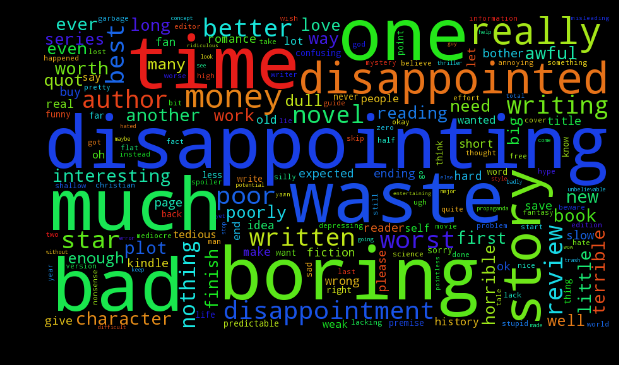

In [33]:
plt.figure( figsize=(6, 4), facecolor='k')
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()